In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all the rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/IPL_ball_by_ball_updated(2021).csv")

In [ ]:
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ddf = df[df['striker'] == 'MS Dhoni']

In [ ]:
ddf.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN


In [ ]:
sum(ddf.runs_off_bat) #RUNS

4746

In [ ]:
len(ddf) #BALLS FACED

3604

In [ ]:
100*sum(ddf.runs_off_bat)/len(ddf) #SR

131.68701442841288

In [ ]:
ddf1 = pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [ ]:
ddf2 = pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()

In [ ]:
ddf3 = ddf1.merge(ddf2, on = 'striker',how = 'left')

In [ ]:
ddf3['strikerate'] = 100*ddf3['runs_off_bat']/ddf3['ball']

In [ ]:
ddf3 = ddf3[ddf3['ball'] >= 1500]

In [ ]:
ddf3 = ddf3[ddf3['strikerate']>=120]

In [ ]:
list = [26,37,80,100,120,146,156,243,288,374,396,417,426,454,473,475,527,544,457,482,529] #deleted all the players who are not in category of lower middle order or finisher

In [ ]:
ddf3 = ddf3.drop(list)
df.reset_index(drop = True,inplace = True)

In [ ]:
ddf3

,striker,runs_off_bat,ball,strikerate
24,AB de Villiers,5181,3487,148.580442
56,AT Rayudu,3916,3145,124.515103
218,JP Duminy,2029,1680,120.773810
231,KA Pollard,3293,2301,143.111691
236,KD Karthik,4047,3198,126.547842
316,MS Dhoni,4746,3604,131.687014
389,RA Jadeja,2386,1944,122.736626
406,RR Pant,2511,1766,142.185730
444,SA Yadav,2341,1763,132.785026
554,YK Pathan,3222,2334,138.046272


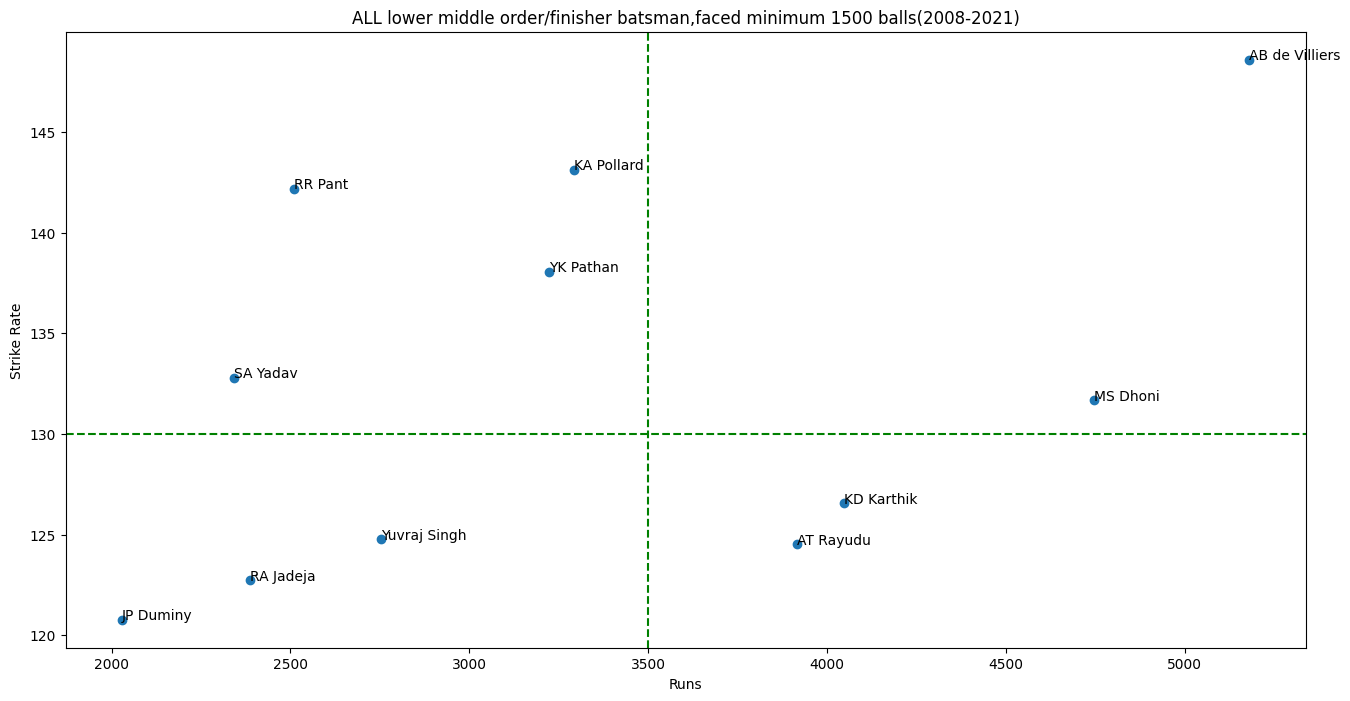

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(ddf3['runs_off_bat'], ddf3['strikerate'])

for index, row in ddf3.iterrows():
    plt.text(row['runs_off_bat'], row['strikerate'], row['striker'])

plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.title('ALL lower middle order/finisher batsman,faced minimum 1500 balls(2008-2021)')

plt.axvline(3500, ls = '--',color = 'green')
plt.axhline(130, ls = '--',color = 'green')
plt.show()


**LAST 5 YEARS (2017-2019)**




In [ ]:
ddf.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN


In [ ]:
ddf4 = pd.DataFrame(ddf.groupby('season')['runs_off_bat'].sum()).reset_index()
ddf5 = pd.DataFrame(ddf.groupby('season')['ball'].count()).reset_index()
ddf6 = ddf4.merge(ddf5, on = 'season',how = 'left')
ddf6['strikerate'] = 100*ddf6['runs_off_bat']/ddf6['ball']

In [ ]:
final_df = ddf6.tail()

In [ ]:
final_df.head()

,season,runs_off_bat,ball,strikerate
9,2017,290,261,111.111111
10,2018,455,321,141.744548
11,2019,416,317,131.230284
12,2020,200,175,114.285714
13,2021,114,111,102.702703


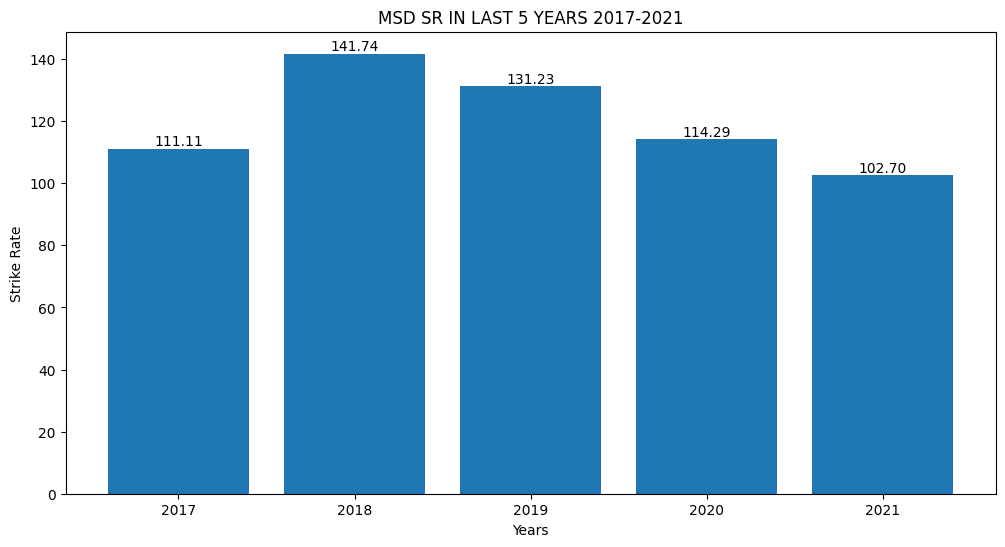

In [ ]:
import matplotlib.pyplot as plt

# Adjust figure size
plt.figure(figsize=(12, 6))

# Plot the bar graph
bars = plt.bar(final_df['season'], final_df['strikerate'])

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Add title and labels
plt.title("MSD SR IN LAST 5 YEARS 2017-2021")
plt.xlabel("Years")
plt.ylabel("Strike Rate")

# Show the plot
plt.show()


**DEATH OVER (last 5 years)**

In [ ]:
death_df = df[df['ball'] >= 16.0]

In [ ]:
death_df = death_df[death_df['season'] >= 2017]

In [ ]:
death_df = death_df[death_df['striker'] == 'MS Dhoni']

In [ ]:
death_df1 = pd.DataFrame(death_df.groupby('season')['runs_off_bat'].sum()).reset_index()
death_df2 = pd.DataFrame(death_df.groupby('season')['ball'].count()).reset_index()

In [ ]:
death_df3 = death_df1.merge(death_df2, on = 'season',how = 'left')
death_df3['strikerate'] = 100*death_df3['runs_off_bat']/death_df3['ball']

In [ ]:
death_df3.head()

,season,runs_off_bat,ball,strikerate
0,2017,134,84,159.523810
1,2018,252,129,195.348837
2,2019,245,139,176.258993
3,2020,97,61,159.016393
4,2021,74,51,145.098039


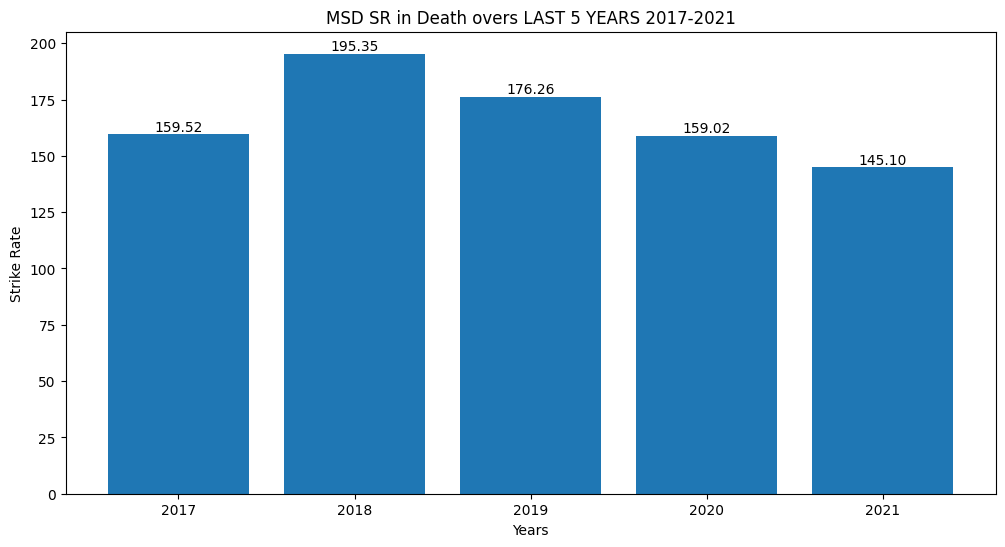

In [ ]:
import matplotlib.pyplot as plt

# Adjust figure size
plt.figure(figsize=(12, 6))

# Plot the bar graph
bars = plt.bar(death_df3['season'], death_df3['strikerate'])

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Add title and labels
plt.title("MSD SR in Death overs LAST 5 YEARS 2017-2021")
plt.xlabel("Years")
plt.ylabel("Strike Rate")

# Show the plot
plt.show()

**CONCLUSION**

In [ ]:
# MSD has an Career SR of around 131 and Runs around 4500+
# MSD in last 5 years has an avg batting SR of around 120,which is not that bad considering 5 years.
# MSD in last 5 years in death over is completely a beast,with an avg strike rate of 167.05,which is far better than his career SR.

#It is fare to say MS still has so much cricket left in him.This are just batting analysis,if you add on his captaincy,field settings,DRS calls,etc he would easily fit in any T20 Team.